In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uybor = pd.read_csv('/data/uybor_ready.csv')

In [3]:
uybor.head(10)

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Yunusobod,3,57.0,4,4,52000
1,1,Yakkasaroy,2,52.0,4,5,56000
2,2,Chilonzor,2,42.0,4,4,37000
3,3,Chilonzor,3,65.0,1,4,49500
4,4,Chilonzor,3,70.0,3,5,55000
5,5,Chilonzor,1,28.0,1,4,25500
6,6,Chilonzor,1,30.0,2,4,21200
7,7,Yakkasaroy,2,32.0,5,5,20000
8,8,Uchtepa,2,51.0,3,4,26200
9,9,Chilonzor,1,30.0,1,4,22200


In [4]:
uybor.drop('Unnamed: 0', axis=1, inplace=True)
uybor.head(10)

,district,rooms,size,level,max_levels,price
0,Yunusobod,3,57.0,4,4,52000
1,Yakkasaroy,2,52.0,4,5,56000
2,Chilonzor,2,42.0,4,4,37000
3,Chilonzor,3,65.0,1,4,49500
4,Chilonzor,3,70.0,3,5,55000
5,Chilonzor,1,28.0,1,4,25500
6,Chilonzor,1,30.0,2,4,21200
7,Yakkasaroy,2,32.0,5,5,20000
8,Uchtepa,2,51.0,3,4,26200
9,Chilonzor,1,30.0,1,4,22200


In [5]:
#redefining categorical variables into a numeric format
categorical_features = ['district']
numerical_features = ['rooms', 'size', 'level', 'max_levels']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)])

In [6]:
#definition of functions (X) and variable (y)
X = uybor.drop(columns=['price'])
y = uybor['price']

In [7]:
#application to objects
X_transformed = preprocessor.fit_transform(X)

In [8]:
#separation of data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [9]:
#creating and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
#the forecast on the test set
y_pred = model.predict(X_test)

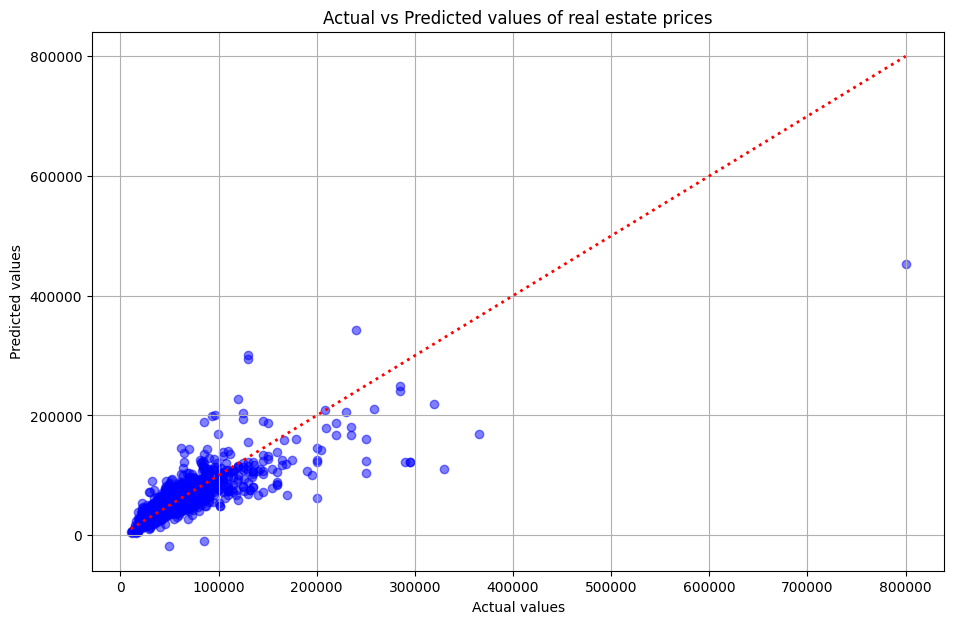

In [29]:
plt.figure(figsize=(11, 7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dotted', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values of real estate prices')
plt.grid(True)
plt.show()

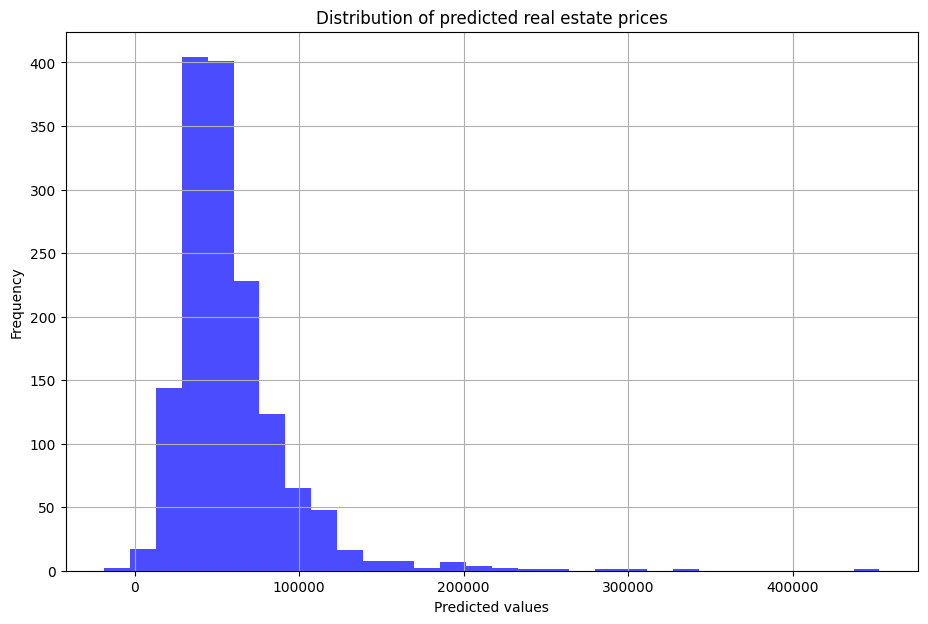

In [32]:
plt.figure(figsize=(11, 7))
plt.hist(y_pred, bins=30, color='blue', alpha=0.7)
plt.xlabel('Predicted values')
plt.ylabel('Frequency')
plt.title('Distribution of predicted real estate prices')
plt.grid(True)
plt.show()

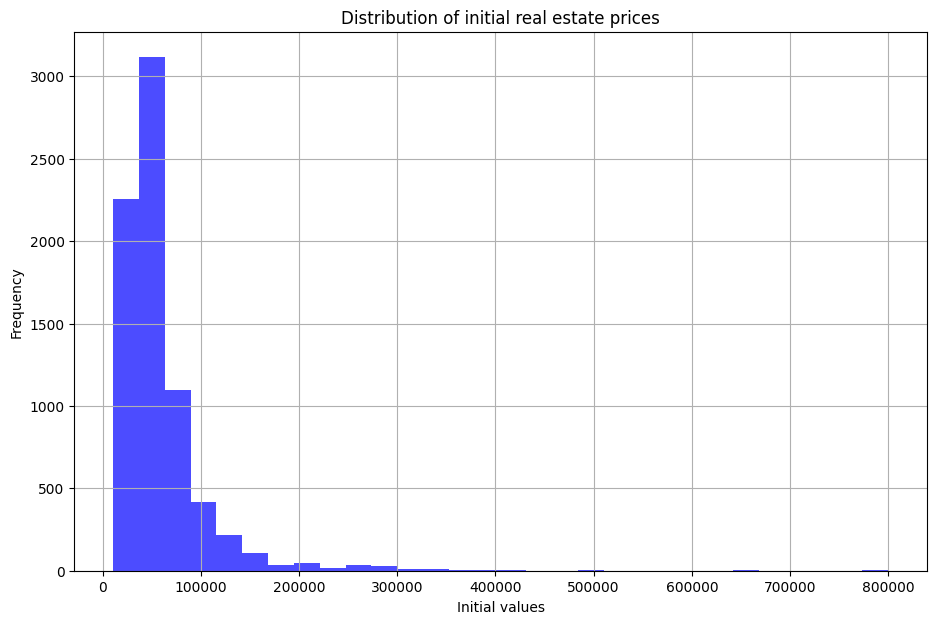

In [35]:
plt.figure(figsize=(11, 7))
plt.hist(uybor['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Initial values')
plt.ylabel('Frequency')
plt.title('Distribution of initial real estate prices')
plt.grid(True)
plt.show()

In [36]:
#evaluating the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 647883361.5877612
R^2 Score: 0.6475764370599527


In [39]:
uybor_price_mean = np.mean(uybor['price'])
print(f'y_test (mean): {np.mean(y_test)}')
print(f'uybor_price (mean): {uybor_price_mean}')

y_test (mean): 58299.71447811448
uybor_price (mean): 59117.618919283115


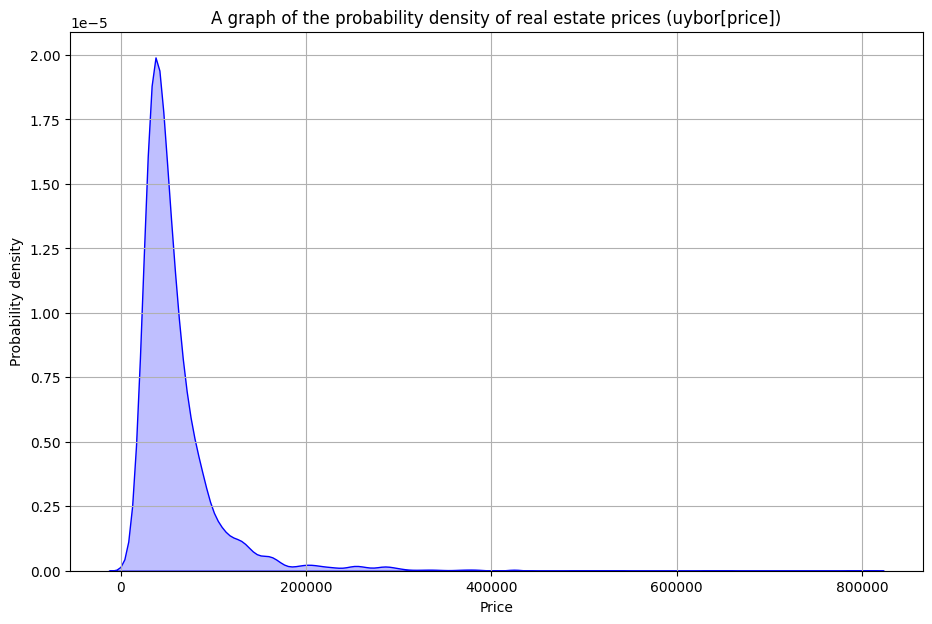

In [44]:
plt.figure(figsize=(11, 7))
sns.kdeplot(uybor['price'], shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.title('A graph of the probability density of real estate prices (uybor[price])')
plt.grid(True)
plt.show()

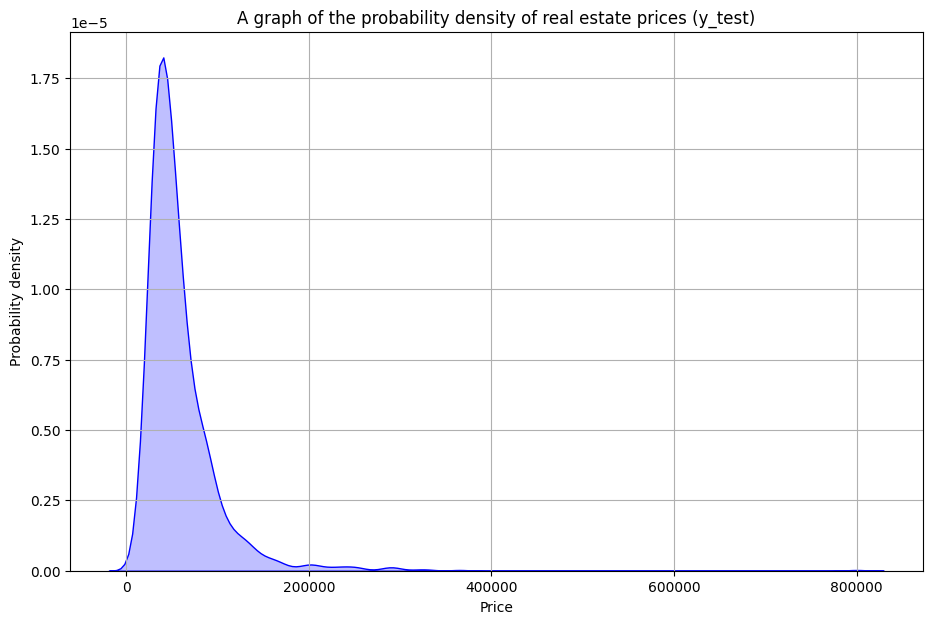

In [45]:
plt.figure(figsize=(11, 7))
sns.kdeplot(y_test, shade=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.title('A graph of the probability density of real estate prices (y_test)')
plt.grid(True)
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_transformed, y, cv=5)
print(f'Average cross validation R^2 Score: {np.mean(cross_val_scores)}')

Average cross validation R^2 Score: 0.6328302386289488
